<a href="https://colab.research.google.com/github/angelinannisa/pcvk/blob/main/pcvkweek6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Accesing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

Make an image histogram like the following histogram output based on the flowchart below :

(Use image lena.jpg) 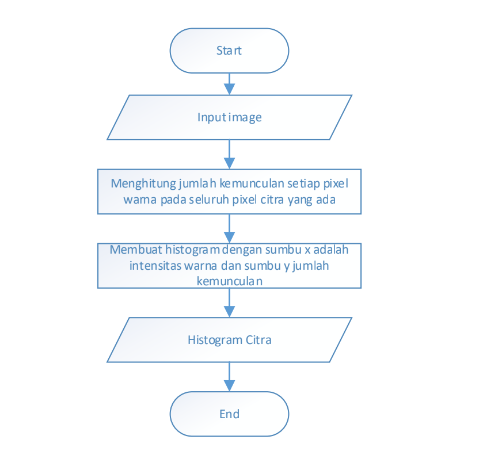

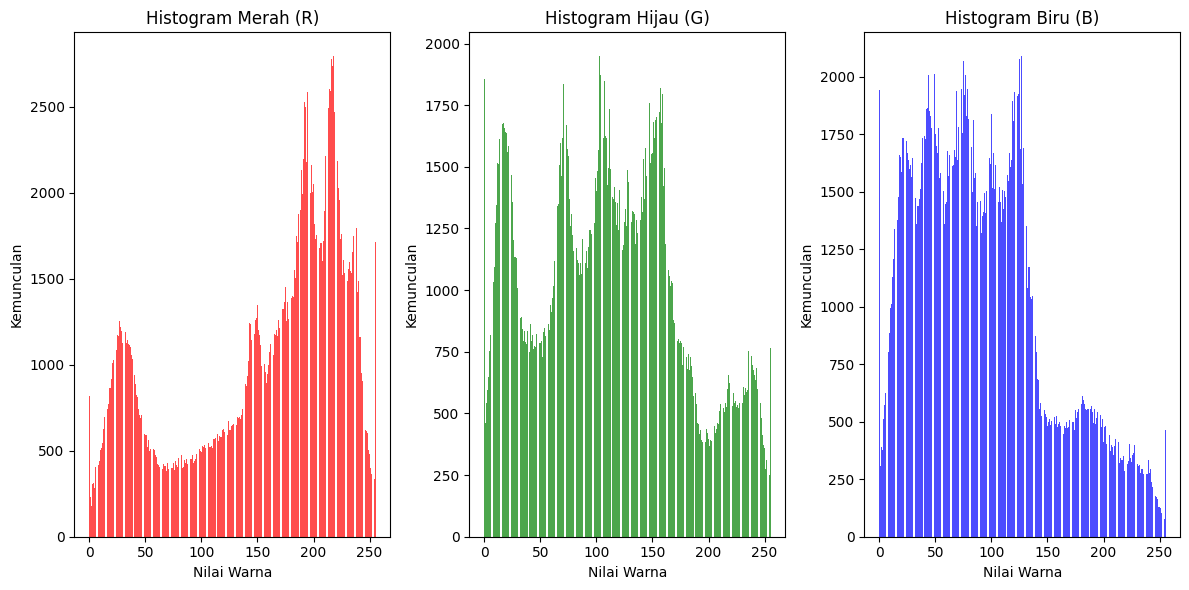

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
original = cv.imread("/content/drive/MyDrive/PCVK/lena.jpg")

# Ubah citra ke dalam skema warna RGB
citra_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Pisahkan saluran warna R, G, dan B
r, g, b = cv.split(citra_rgb)

# Hitung histogram untuk setiap saluran warna R, G, dan B
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])

# Membuat tiga subplot
plt.figure(figsize=(12, 6))

# Subplot untuk histogram Merah (R)
plt.subplot(131)
plt.bar(np.arange(256), hist_r[:, 0], color='red', alpha=0.7, label='Merah (R)')
plt.title('Histogram Merah (R)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Hijau (G)
plt.subplot(132)
plt.bar(np.arange(256), hist_g[:, 0], color='green', alpha=0.7, label='Hijau (G)')
plt.title('Histogram Hijau (G)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Biru (B)
plt.subplot(133)
plt.bar(np.arange(256), hist_b[:, 0], color='blue', alpha=0.7, label='Biru (B)')
plt.title('Histogram Biru (B)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Tampilkan plot
plt.tight_layout()
plt.show()


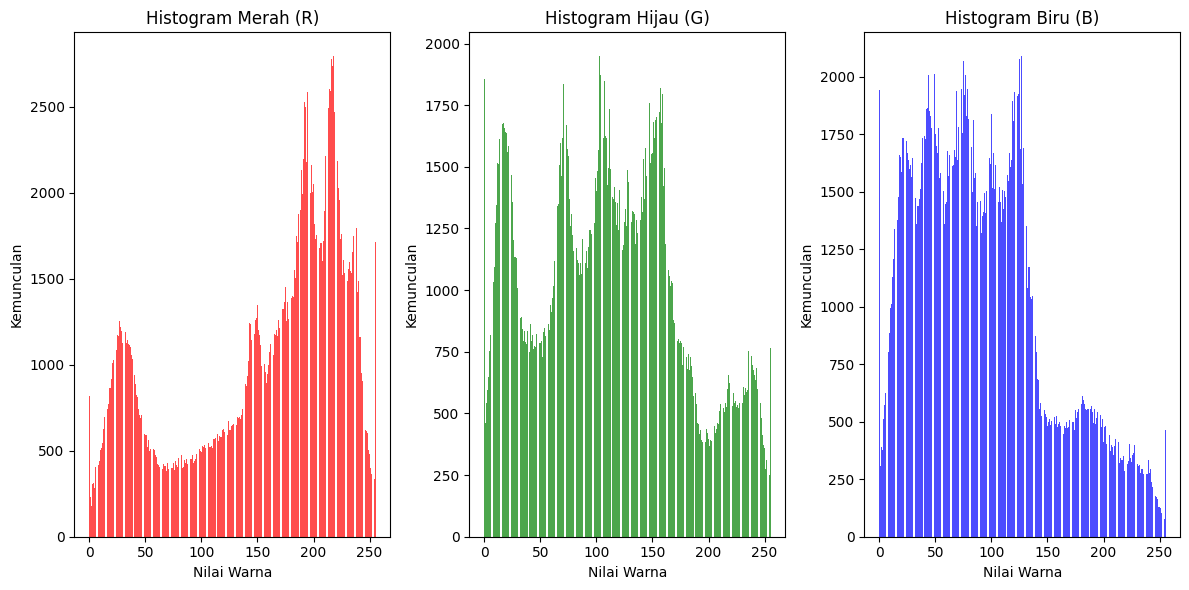

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
original = cv.imread("/content/drive/MyDrive/PCVK/lena.jpg")

# Convert the image to RGB
citra_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Split the RGB channels
r, g, b = cv.split(citra_rgb)

# Calculate histograms using NumPy's numpy.histogram
hist_r, bins_r = np.histogram(r, bins=256, range=(0, 256))
hist_g, bins_g = np.histogram(g, bins=256, range=(0, 256))
hist_b, bins_b = np.histogram(b, bins=256, range=(0, 256))

# Membuat tiga subplot
plt.figure(figsize=(12, 6))

# Subplot untuk histogram Merah (R)
plt.subplot(131)
plt.bar(np.arange(256), hist_r, color='red', alpha=0.7, label='Merah (R)')
plt.title('Histogram Merah (R)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Hijau (G)
plt.subplot(132)
plt.bar(np.arange(256), hist_g, color='green', alpha=0.7, label='Hijau (G)')
plt.title('Histogram Hijau (G)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Biru (B)
plt.subplot(133)
plt.bar(np.arange(256), hist_b, color='blue', alpha=0.7, label='Biru (B)')
plt.title('Histogram Biru (B)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Tampilkan plot
plt.tight_layout()
plt.show()

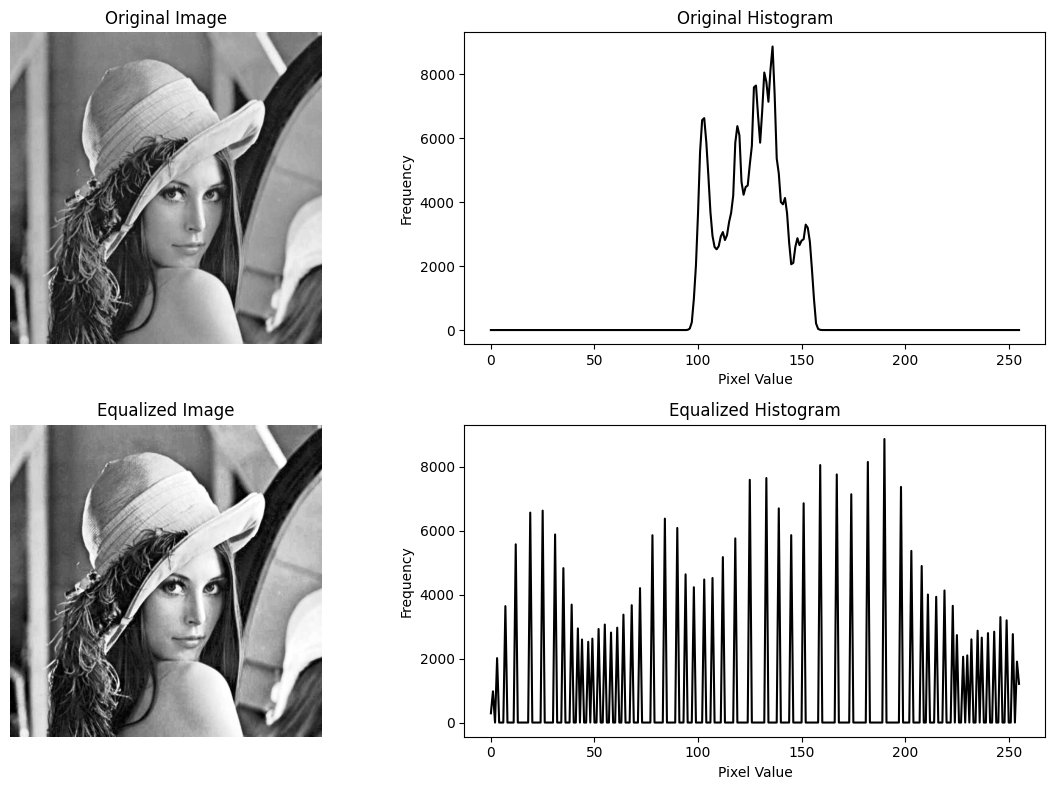

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram of the original image
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Calculate the histogram of the equalized image
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Create subplots for original image, original histogram, equalized image, and equalized histogram
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Original Histogram
plt.subplot(2, 2, 2)
plt.plot(hist_original, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Equalized Histogram
plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='black')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Show the subplots
plt.tight_layout()
plt.show()
